In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
X_train = np.array([
    [10, 8, 2],
    [8, 6, 5],
    [12, 7, 1],
    [6, 6, 8],
    [15, 8, 0],
    [7, 5, 6],
    [9, 7, 3],
    [14, 9, 0],
    [5, 4, 10],
    [11, 8, 2]
])
y_train = np.array([85, 70, 90, 60, 95, 65, 80, 93, 50, 88])

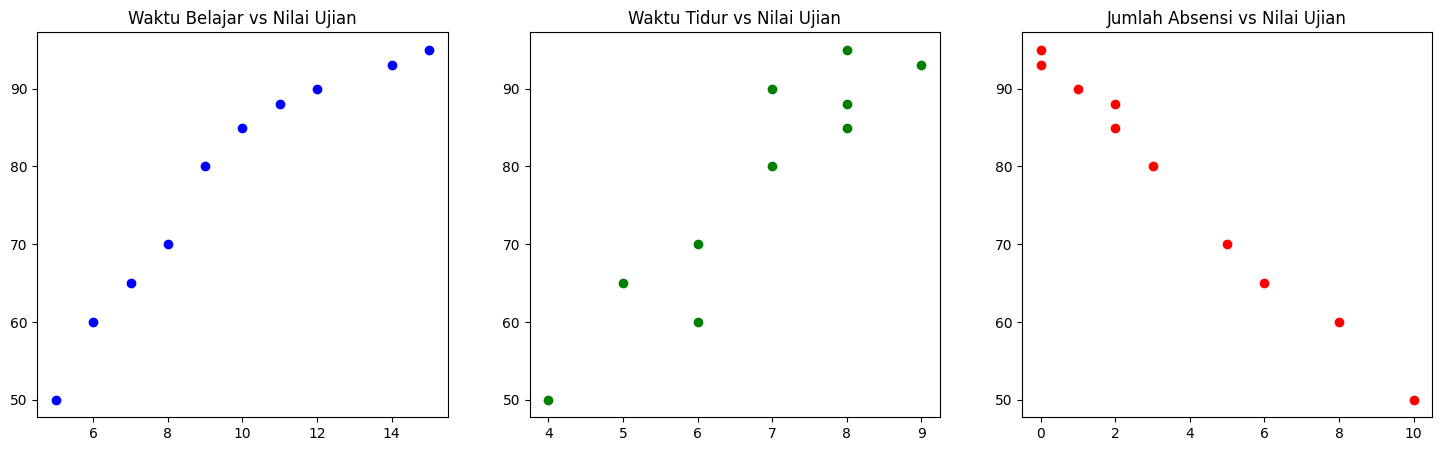

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

ax[0].scatter(X_train[:, 0], y_train, c="blue")
ax[0].set_title("Waktu Belajar vs Nilai Ujian")

ax[1].scatter(X_train[:, 1], y_train, c="green")
ax[1].set_title("Waktu Tidur vs Nilai Ujian")

ax[2].scatter(X_train[:, 2], y_train, c="red")
ax[2].set_title("Jumlah Absensi vs Nilai Ujian")
plt.show()

In [4]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost_sum = 0
    total_cost = 0

    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost

    total_cost = cost_sum / (2*m)

    return total_cost

In [5]:
init_w = np.array([0, 0, 0])
init_b = 0

cost_init = compute_cost(X_train, y_train, init_w, init_b)
print("Cost at initial w, b = 0 : ", cost_init)

Cost at initial w, b = 0 :  3118.4


In [6]:
def compute_gradient(X, y, w, b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i, j]
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


In [7]:
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, init_w, init_b)
print("Gradient initial w, b : ", tmp_dj_dw, tmp_dj_db)

Gradient initial w, b :  [-797.  -547.6 -239.6] -77.6


In [8]:
def gradient_descent(X, y, w_init, b_init, cost_f, gradient_f, alpha, iters):
    w = copy.deepcopy(w_init)
    b = b_init
    J_history = []

    for i in range(1, iters+1):
        dj_dw, dj_db = gradient_f(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 1000000:
            J_history.append(cost_f(X, y, w, b))

        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history



In [9]:
alpha = 0.01
iterations = 150000

w, b, _ = gradient_descent(
    X_train,
    y_train,
    init_w,
    init_b,
    compute_cost,
    compute_gradient,
    alpha,
    iterations)

print("w, b after gradient descent: ", w, b)

Iteration 15000: Cost     4.64
Iteration 30000: Cost     2.47
Iteration 45000: Cost     1.53
Iteration 60000: Cost     1.12
Iteration 75000: Cost     0.94
Iteration 90000: Cost     0.87
Iteration 105000: Cost     0.83
Iteration 120000: Cost     0.82
Iteration 135000: Cost     0.81
Iteration 150000: Cost     0.81
w, b after gradient descent:  [ 0.46946335  1.12149526 -3.58354842] 78.67576652071745


In [10]:
m = X_train.shape[0]
y_hat = np.zeros(m)

for i in range(m):
    y_hat[i] = np.dot(X_train[i], w) + b
    print(f"prediction: {y_hat[i]:0.2f}, target value: {y_train[i]}")

prediction: 85.18, target value: 85
prediction: 71.24, target value: 70
prediction: 88.58, target value: 90
prediction: 59.55, target value: 60
prediction: 94.69, target value: 95
prediction: 66.07, target value: 65
prediction: 80.00, target value: 80
prediction: 95.34, target value: 93
prediction: 49.67, target value: 50
prediction: 85.64, target value: 88


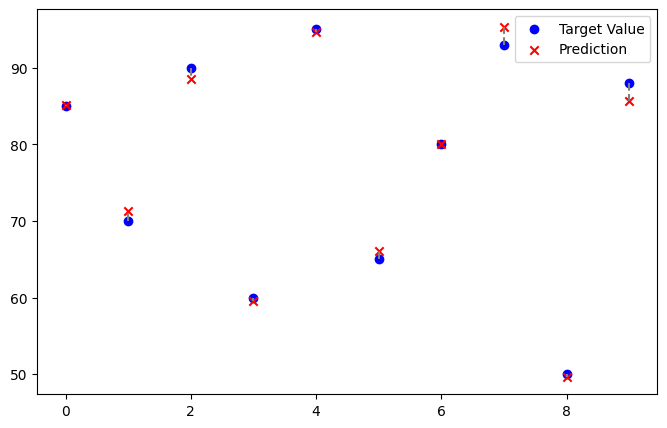

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_train)), y_train, color='blue', label='Target Value')
plt.scatter(range(len(y_hat)), y_hat, color='red', marker='x', label='Prediction')

for i in range(len(y_train)):
    plt.plot([i, i], [y_train[i], y_hat[i]], color='gray', linestyle='dashed')

plt.legend()
plt.show()

In [12]:
X_test = np.array([9, 4 ,5])
y_pred = np.dot(X_test, w) + b

print(f"Siswa dengan : \nwaktu belajar selama {X_test[0]} jam per minggu, \nrata-rata waktu tidur selama {X_test[1]} jam per hari, dan \ntidak hadir selama {X_test[2]} hari dalam bulan, \ndiprediksi akan memperoleh nilai ujian sebesar {y_pred:0.2f}")

Siswa dengan : 
waktu belajar selama 9 jam per minggu, 
rata-rata waktu tidur selama 4 jam per hari, dan 
tidak hadir selama 5 hari dalam bulan, 
diprediksi akan memperoleh nilai ujian sebesar 69.47
